## Install `gapminder` package

```sh

# from a terminal

mamba install -c conda-forge -n bios512 r-gapminder r-gifski r-gganimate

```

## Load libraries

In [1]:
library('tidyverse')
library('gganimate')
library('palmerpenguins')
library('gapminder')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## Function for displaying `GIFs`

In [2]:
display_gif = function(gganim, ...){
    
    raw = suppressMessages(animate(gganim, ..., renderer = gifski_renderer()))
    
    contents = base64enc::base64encode(raw)
    tag = '<img src="data:image/gif;base64,%s">'
    
    IRdisplay::display_html(sprintf(tag, contents))
    
}

## Iris example


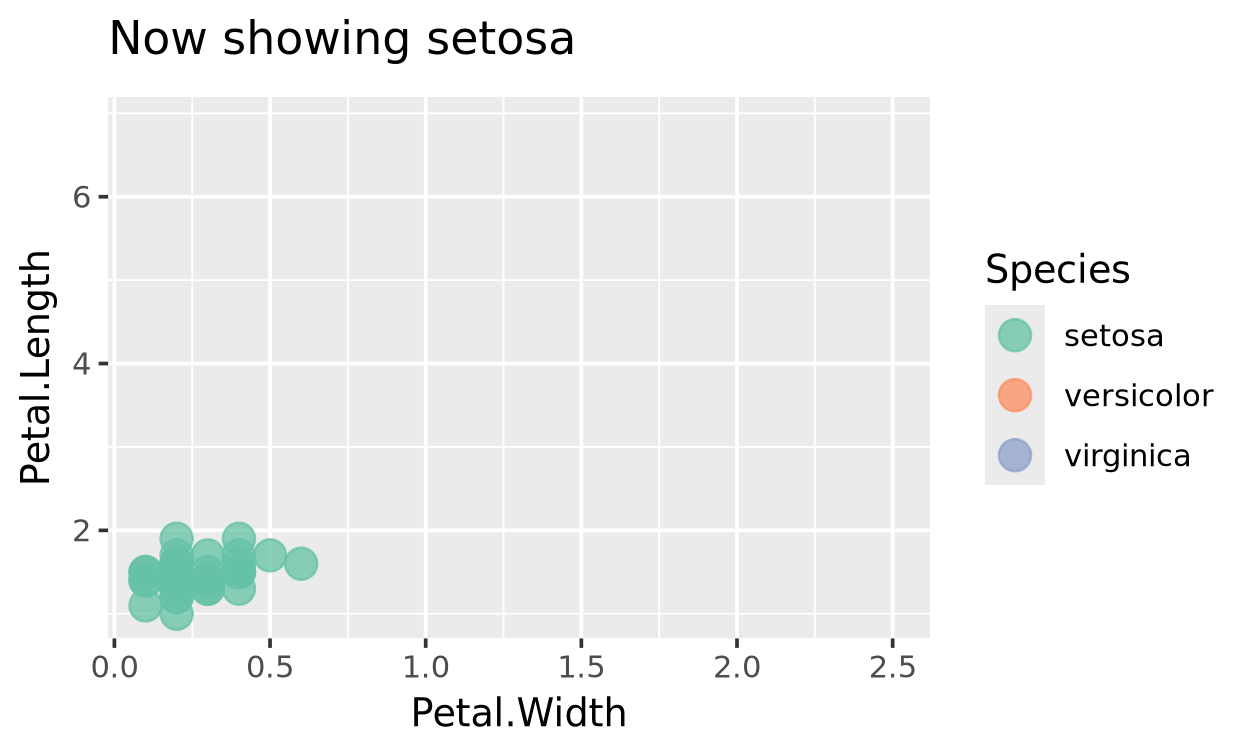

In [3]:
anim = ggplot(iris, aes(x = Petal.Width, y = Petal.Length, colour = Species)) + 
    geom_point(size = 4, alpha = 0.75) +
    scale_color_brewer(palette = 'Set2') +
    ggtitle('Now showing {closest_state}') +
    transition_states(Species,
                      transition_length = 2,
                      state_length = 1) + 
    enter_grow() + 
    exit_shrink()

display_gif(anim, width = 5, height = 3, units = 'in', res = 250)

## Tweening

In [4]:
penguins |> head()

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>
Adelie,Torgersen,39.1,18.7,181,3750,male,2007
Adelie,Torgersen,39.5,17.4,186,3800,female,2007
Adelie,Torgersen,40.3,18.0,195,3250,female,2007
Adelie,Torgersen,NA,NA,NA,NA,NA,2007
Adelie,Torgersen,36.7,19.3,193,3450,female,2007
Adelie,Torgersen,39.3,20.6,190,3650,male,2007


In [5]:
penguins2 = penguins |> 
    mutate(penguin_id = row_number()) |>
    pivot_longer(cols = c(bill_length_mm, bill_depth_mm)) |>
    # filter(species == 'Adelie') |>
    select(species, name, value, penguin_id)

penguins2 |> head()

species,name,value,penguin_id
<fct>,<chr>,<dbl>,<int>
Adelie,bill_length_mm,39.1,1
Adelie,bill_depth_mm,18.7,1
Adelie,bill_length_mm,39.5,2
Adelie,bill_depth_mm,17.4,2
Adelie,bill_length_mm,40.3,3
Adelie,bill_depth_mm,18.0,3


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 4 rows containing non-finite outside the scale range (`stat_bin()`).”


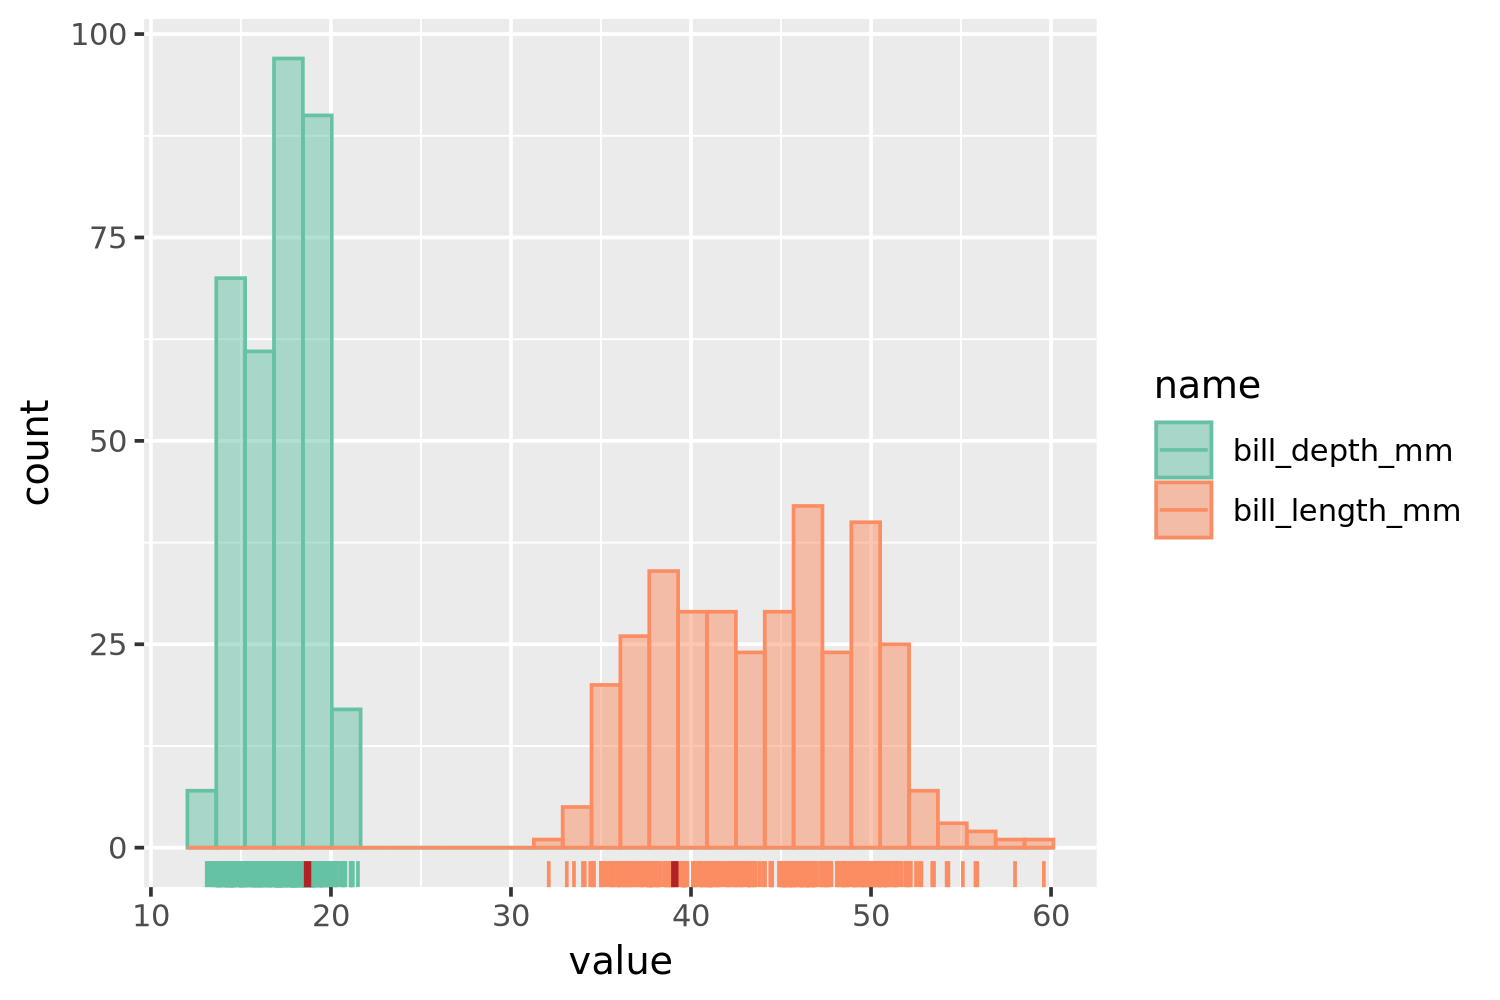

In [6]:
options(repr.plot.width = 6, repr.plot.height = 4)

p = ggplot(penguins2, aes(x = value, fill = name, color = name)) + 
    geom_histogram(position = 'identity', alpha = 0.5) +
    scale_color_brewer(palette = 'Set2') +
    scale_fill_brewer(palette = 'Set2') +
    geom_rug(mapping = aes(group = penguin_id)) +
    geom_rug(mapping = aes(group = penguin_id), data = penguins2 |> filter(penguin_id == 1), color = 'firebrick', size = 1)

p

Warning message:
“Removed 4 rows containing non-finite outside the scale range (`stat_bin()`).”



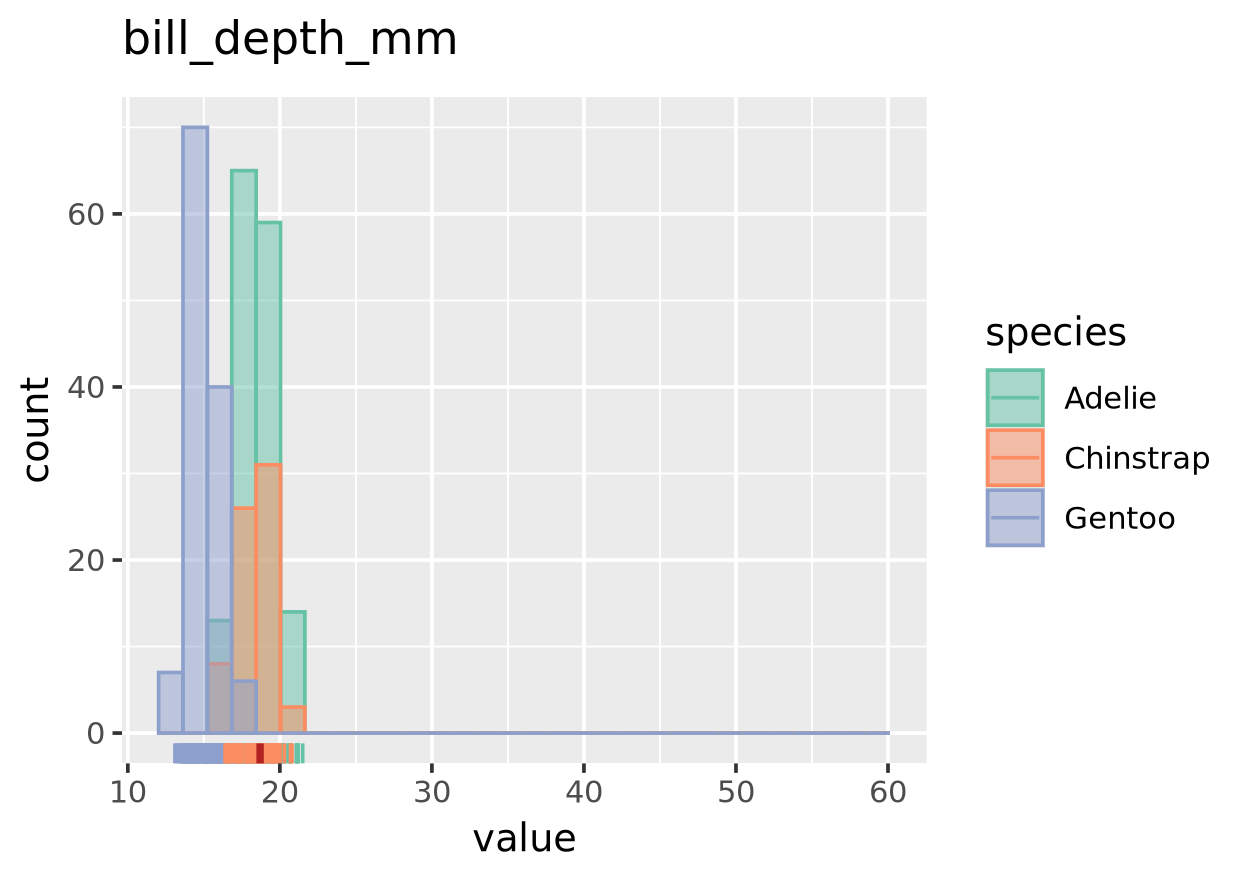

In [7]:
anim = ggplot(penguins2, aes(x = value, fill = species, color = species)) + 
    geom_histogram(position = 'identity', alpha = 0.5) +
    scale_color_brewer(palette = 'Set2') +
    scale_fill_brewer(palette = 'Set2') +
    geom_rug(mapping = aes(group = penguin_id)) +
    geom_rug(mapping = aes(group = penguin_id), data = penguins2 |> filter(penguin_id == 1), color = 'firebrick', size = 1) +
    transition_states(name) +
    ggtitle('{closest_state}')

display_gif(anim, width = 5, height = 3.5, units = 'in', res = 250)

### What about body mass versus bill depth/bill length?

In [8]:
penguins2 |> head()

species,name,value,penguin_id
<fct>,<chr>,<dbl>,<int>
Adelie,bill_length_mm,39.1,1
Adelie,bill_depth_mm,18.7,1
Adelie,bill_length_mm,39.5,2
Adelie,bill_depth_mm,17.4,2
Adelie,bill_length_mm,40.3,3
Adelie,bill_depth_mm,18.0,3


## Bar chart race

Adapted from excellent example here: [https://evamaerey.github.io/little_flipbooks_library/racing_bars/racing_barcharts.html](https://evamaerey.github.io/little_flipbooks_library/racing_bars/racing_barcharts.html)

In [9]:
ranked_countries = gapminder |>
  select(country, pop, year, continent) |>  
  group_by(year) |>  
  arrange(year, -pop) |>  
  mutate(rank = row_number(), date = parse_date_time(year, '%Y')) |>  
  filter(rank <= 10)

ranked_countries |> head()

country,pop,year,continent,rank,date
<fct>,<int>,<int>,<fct>,<int>,<dttm>
China,556263527,1952,Asia,1,1952-01-01
India,372000000,1952,Asia,2,1952-01-01
United States,157553000,1952,Americas,3,1952-01-01
Japan,86459025,1952,Asia,4,1952-01-01
Indonesia,82052000,1952,Asia,5,1952-01-01
Germany,69145952,1952,Europe,6,1952-01-01



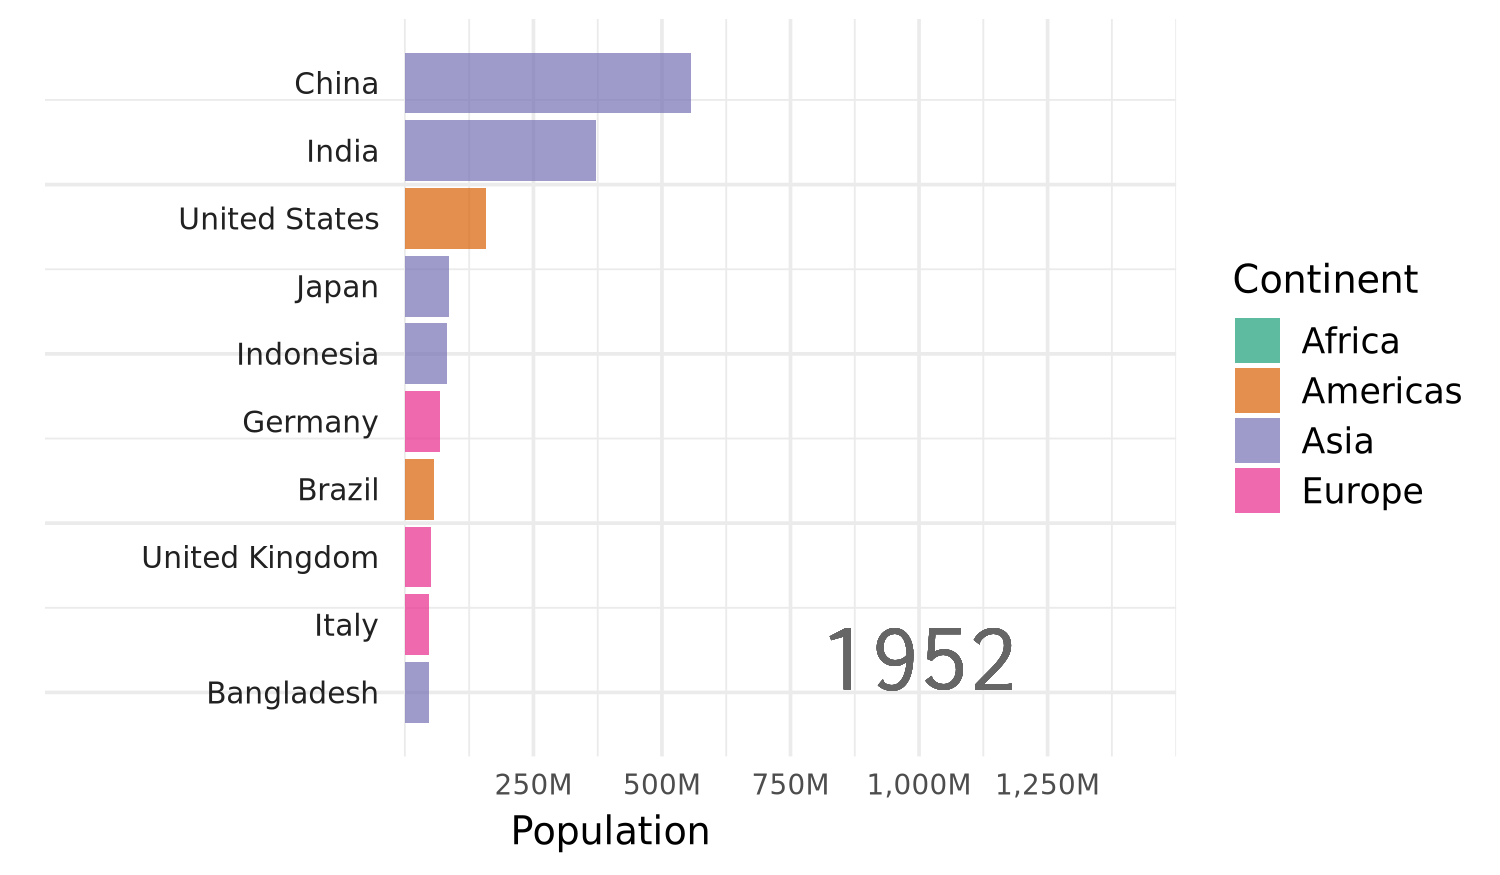

In [10]:
anim = ggplot(ranked_countries,  
              aes(xmin = 0,  
                  xmax = pop / 1000000,
                  ymin = rank - .45,  
                  ymax = rank + .45,
                  y = rank,
                  fill = continent,
                  group = country)) +  
    geom_rect(alpha = .7) +  
    geom_text(col = "gray13",  
              hjust = "right",  
              aes(label = country), 
              size = 3,
              x = -50) + 
    geom_text(x = 1000 , y = -9.5,  
              family = "Monospace",  
              aes(label = as.character(year)),  
              size = 10, col = "grey40") +
    scale_fill_brewer(palette = "Dark2") +   
    scale_y_reverse() +  
    scale_x_continuous(limits = c(-600, 1400), breaks = c(250, 500, 750, 1000, 1250), labels = scales::label_comma(suffix = 'M')) +  
    labs(x = 'Population', y = '', fill = 'Continent') +  
    theme_minimal() +
    theme(legend.text = element_text(size = 10), legend.key.size = unit(0.2, "in"),
          axis.text.y = element_blank(), axis.text.x = element_text(size = 8)) +
    transition_states(date) + enter_fade() + exit_fade() # this is it!
    
display_gif(anim, height = 3.5, width = 6, units = 'in', res = 250, nframes = 300, fps = 20)

### Make a bar chart for one year with `geom_col`

In [11]:
ranked_countries |> head()

country,pop,year,continent,rank,date
<fct>,<int>,<int>,<fct>,<int>,<dttm>
China,556263527,1952,Asia,1,1952-01-01
India,372000000,1952,Asia,2,1952-01-01
United States,157553000,1952,Americas,3,1952-01-01
Japan,86459025,1952,Asia,4,1952-01-01
Indonesia,82052000,1952,Asia,5,1952-01-01
Germany,69145952,1952,Europe,6,1952-01-01


### Make a bar chart for one year with `geom_rect`